In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tqdm
import time
import scipy as sp
import DHT_functions_no_numba as DHT

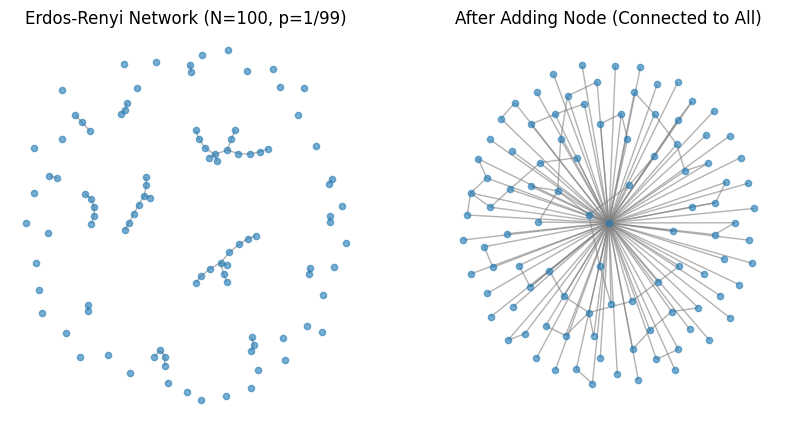

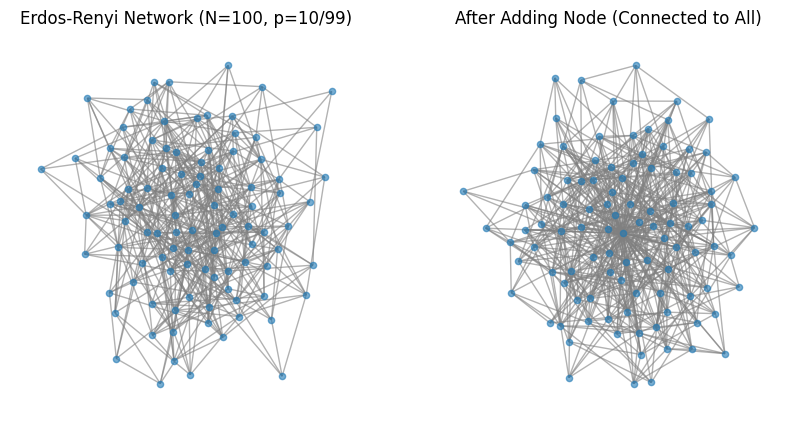

In [2]:
# G = nx.watts_strogatz_graph(n=200, k=4, p=0.2)
G = nx.erdos_renyi_graph(100, 1/(100-1))

# Draw the initial network
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
nx.draw(G, node_size=20, edge_color="gray", alpha=0.6, pos=nx.spring_layout(G))
plt.title("Erdos-Renyi Network (N=100, p=1/99)")

# Pick an existing node (e.g., node 0) and connect it to all other nodes
selected_node = 0
G.add_edges_from((selected_node, node) for node in G.nodes if node != selected_node)

# Draw the modified network
plt.subplot(1, 2, 2)
nx.draw(G, node_size=20, edge_color="gray", alpha=0.6, pos=nx.spring_layout(G))
plt.title("After Adding Node (Connected to All)")

plt.show()

# G = nx.watts_strogatz_graph(n=200, k=4, p=0.2)
G = nx.erdos_renyi_graph(100, 10/(100-1))

# Draw the initial network
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
nx.draw(G, node_size=20, edge_color="gray", alpha=0.6, pos=nx.spring_layout(G))
plt.title("Erdos-Renyi Network (N=100, p=10/99)")

# Pick an existing node (e.g., node 0) and connect it to all other nodes
selected_node = 0
G.add_edges_from((selected_node, node) for node in G.nodes if node != selected_node)

# Draw the modified network
plt.subplot(1, 2, 2)
nx.draw(G, node_size=20, edge_color="gray", alpha=0.6, pos=nx.spring_layout(G))
plt.title("After Adding Node (Connected to All)")

plt.show()

In [8]:
N = 100
k = 1
M = 4
true_hypothesis = M - 1
num_deviant_agents = int(np.round(N/15, 0))
num_iterations = 50
cap = 1
# seed = int(time.time())
seed = 1742024984
np.random.seed(seed)
print(seed)

1742024984


In [9]:
num_simulations = 100
private_belief_histories = np.zeros((num_simulations, num_iterations+1, N, M))
public_belief_histories = np.zeros((num_simulations, num_iterations+1, N, M))
T_private_histories = np.zeros((num_simulations, num_iterations+1))
T_public_histories = np.zeros((num_simulations, num_iterations+1))
C_histories = np.zeros((num_simulations, num_iterations+1))

for i in tqdm.trange(num_simulations):

    G = nx.erdos_renyi_graph(N, k/(N-1))
    # selected_node = 0
    # G.add_edges_from((selected_node, node) for node in G.nodes if node != selected_node)
    private_belief_history, public_belief_history, T_private_history, T_public_history, C_history = DHT.simulator(G, N, M, true_hypothesis, num_iterations, cap, False, False, num_deviant_agents)
    
    private_belief_histories[i] = private_belief_history
    public_belief_histories[i] = public_belief_history
    T_private_histories[i] = T_private_history
    T_public_histories[i] = T_public_history
    C_histories[i] = C_history
    
    seed += 1
    np.random.seed(seed)

100%|██████████| 100/100 [00:06<00:00, 14.92it/s]


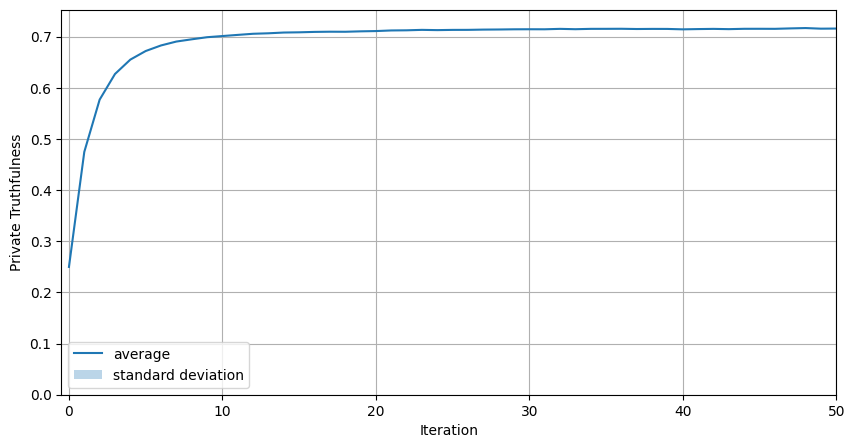

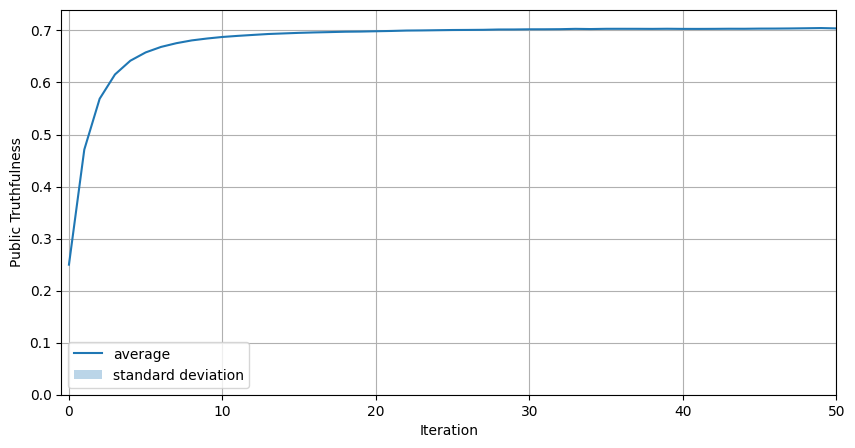

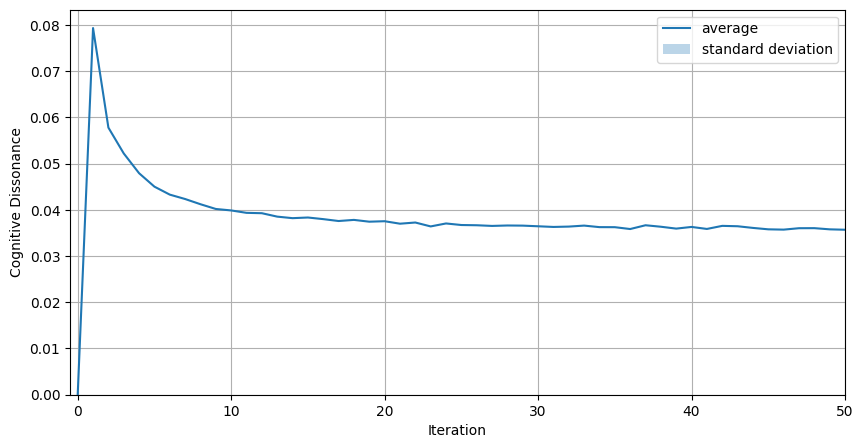

In [10]:
T_private_history = DHT.calculate_mean(T_private_histories)
T_public_history = DHT.calculate_mean(T_public_histories)
C_history = DHT.calculate_mean(C_histories)

DHT.plot_history(T_private_history, num_iterations, "Private Truthfulness")
DHT.plot_history(T_public_history, num_iterations, "Public Truthfulness") 
DHT.plot_history(C_history, num_iterations, "Cognitive Dissonance")

In [6]:
private_belief_history = DHT.calculate_mean(private_belief_histories)
public_belief_history = DHT.calculate_mean(public_belief_histories)
T_private_history = DHT.calculate_mean(T_private_histories)
T_public_history = DHT.calculate_mean(T_public_histories)
C_history = DHT.calculate_mean(C_histories)

std_private_belief_history = DHT.calculate_std(private_belief_histories)
std_public_belief_history = DHT.calculate_std(public_belief_histories)
std_T_private_history = DHT.calculate_std(T_private_histories)
std_T_public_history = DHT.calculate_std(T_public_histories)
std_C_history = DHT.calculate_std(C_histories)

conf_private_belief_history = DHT.calculate_confidence_interval(private_belief_histories, num_simulations)
conf_public_belief_history = DHT.calculate_confidence_interval(public_belief_histories, num_simulations)
conf_T_private_history = DHT.calculate_confidence_interval(T_private_histories, num_simulations)
conf_T_public_history = DHT.calculate_confidence_interval(T_public_histories, num_simulations)
conf_C_history = DHT.calculate_confidence_interval(C_histories, num_simulations)

median_private_belief_history = DHT.calculate_median(private_belief_histories)
median_public_belief_history = DHT.calculate_median(public_belief_histories)
median_T_private_history = DHT.calculate_median(T_private_histories)
median_T_public_history = DHT.calculate_median(T_public_histories)
median_C_history = DHT.calculate_median(C_histories)

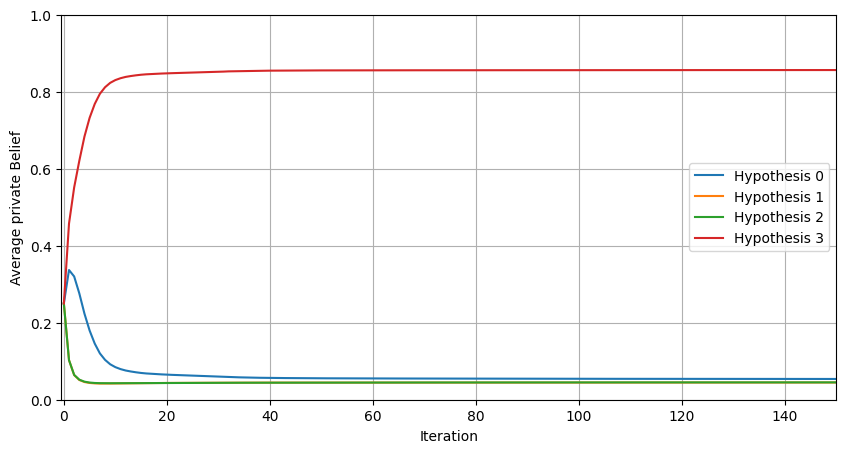

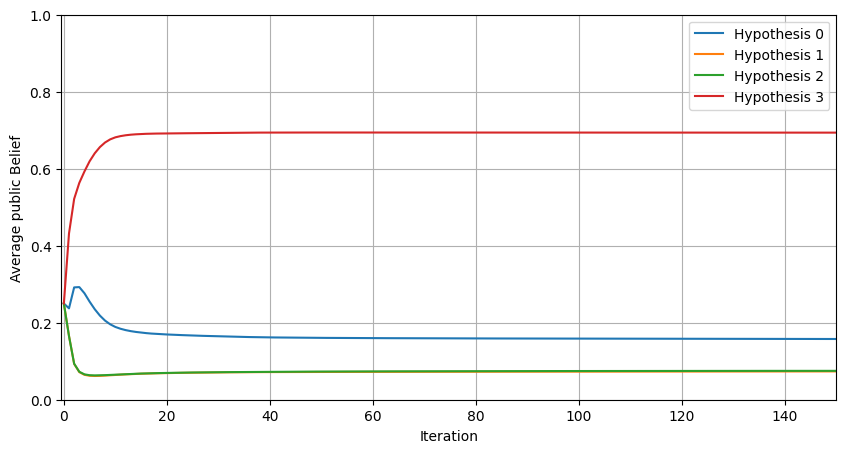

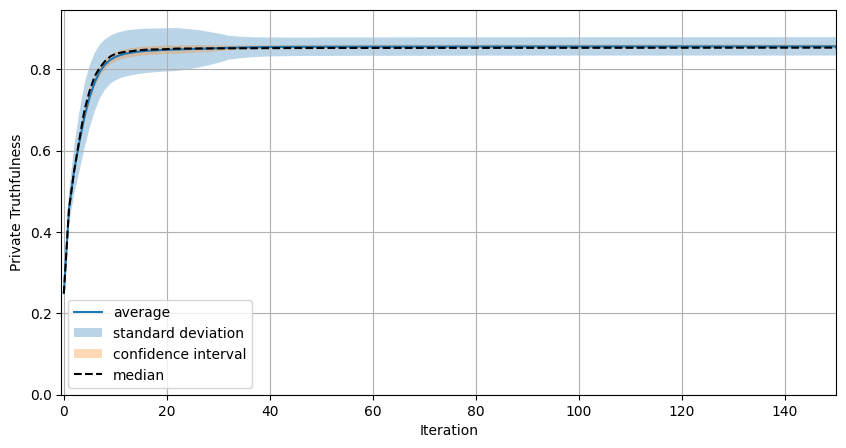

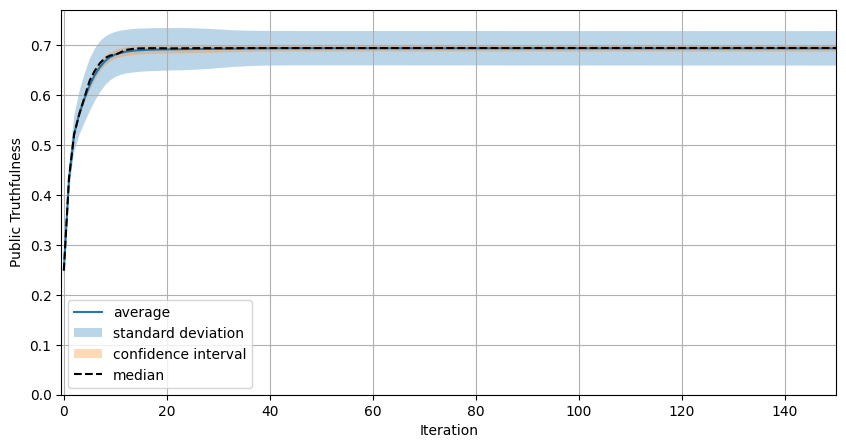

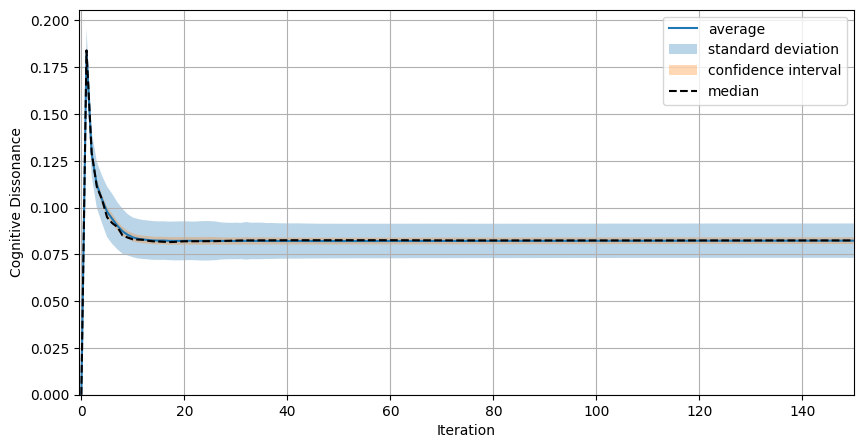

In [7]:
DHT.plot_belief_history(private_belief_history, M, num_iterations, 'Average private Belief')
DHT.plot_belief_history(public_belief_history, M, num_iterations, 'Average public Belief')

DHT.plot_history(T_private_history, num_iterations, "Private Truthfulness", std_array=std_T_private_history, conf_array=conf_T_private_history, median_array=median_T_private_history)
DHT.plot_history(T_public_history, num_iterations, "Public Truthfulness", std_array=std_T_public_history, conf_array=conf_T_public_history, median_array=median_T_public_history) 
DHT.plot_history(C_history, num_iterations, "Cognitive Dissonance", std_array=std_C_history, conf_array=conf_C_history, median_array=median_C_history)